In [1]:
# prepare data for CNN
from pandas import read_csv
from pandas import DataFrame
from numpy import array
from numpy import sqrt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt

In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
# load dataset
dataset = read_csv('fusedData158324.csv', header=0, index_col=0)
mean_value = dataset['vehiclecount'].mean()
dataset['vehiclecount'].fillna(value=mean_value, inplace=True)

values = dataset.values

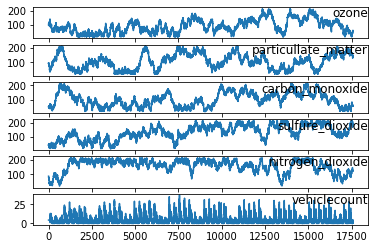

In [4]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [5]:
# ensure all data is float
values = values.astype('float32')

In [6]:
# choose a number of time steps
n_steps = 132

In [7]:
# convert into input/output
X, y = split_sequences(values, n_steps)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [8]:
# reshape the data
n_features = X.shape[2]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * n_features))

In [9]:
...
# define model
model = Sequential()
model.add(Conv1D(filters=8, kernel_size=4, activation='relu', input_shape=(n_steps * n_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
# fit model
history = model.fit(x_train, y_train, epochs=700, batch_size=100, validation_data=(x_test, y_test), verbose=2)

Epoch 1/700
141/141 - 2s - loss: 1164.6683 - val_loss: 48.4787 - 2s/epoch - 12ms/step
Epoch 2/700
141/141 - 1s - loss: 36.2271 - val_loss: 32.6840 - 971ms/epoch - 7ms/step
Epoch 3/700
141/141 - 1s - loss: 32.8955 - val_loss: 30.7514 - 1s/epoch - 7ms/step
Epoch 4/700
141/141 - 1s - loss: 29.9217 - val_loss: 28.8834 - 1s/epoch - 7ms/step
Epoch 5/700
141/141 - 1s - loss: 29.9623 - val_loss: 42.0983 - 1s/epoch - 9ms/step
Epoch 6/700
141/141 - 1s - loss: 29.9635 - val_loss: 28.7929 - 1s/epoch - 8ms/step
Epoch 7/700
141/141 - 1s - loss: 29.1274 - val_loss: 33.0325 - 1s/epoch - 7ms/step
Epoch 8/700
141/141 - 1s - loss: 31.1950 - val_loss: 40.5433 - 1s/epoch - 7ms/step
Epoch 9/700
141/141 - 1s - loss: 30.3503 - val_loss: 29.5295 - 1s/epoch - 8ms/step
Epoch 10/700
141/141 - 1s - loss: 32.7534 - val_loss: 96.9391 - 995ms/epoch - 7ms/step
Epoch 11/700
141/141 - 1s - loss: 31.9533 - val_loss: 32.3226 - 1s/epoch - 7ms/step
Epoch 12/700
141/141 - 1s - loss: 29.6133 - val_loss: 29.1701 - 1s/epoch - 7

Epoch 98/700
141/141 - 1s - loss: 9.4663 - val_loss: 11.6731 - 1s/epoch - 7ms/step
Epoch 99/700
141/141 - 1s - loss: 9.5903 - val_loss: 10.5865 - 1s/epoch - 7ms/step
Epoch 100/700
141/141 - 1s - loss: 9.6940 - val_loss: 11.5825 - 1s/epoch - 7ms/step
Epoch 101/700
141/141 - 1s - loss: 9.1478 - val_loss: 10.6524 - 1s/epoch - 7ms/step
Epoch 102/700
141/141 - 1s - loss: 9.7875 - val_loss: 10.5339 - 1s/epoch - 7ms/step
Epoch 103/700
141/141 - 1s - loss: 9.0827 - val_loss: 11.7858 - 1s/epoch - 7ms/step
Epoch 104/700
141/141 - 1s - loss: 8.8501 - val_loss: 11.0072 - 1s/epoch - 7ms/step
Epoch 105/700
141/141 - 1s - loss: 9.0769 - val_loss: 10.8446 - 1s/epoch - 8ms/step
Epoch 106/700
141/141 - 1s - loss: 8.7184 - val_loss: 12.4541 - 1s/epoch - 9ms/step
Epoch 107/700
141/141 - 1s - loss: 8.5845 - val_loss: 15.4497 - 1s/epoch - 8ms/step
Epoch 108/700
141/141 - 1s - loss: 9.1491 - val_loss: 14.2037 - 1s/epoch - 10ms/step
Epoch 109/700
141/141 - 1s - loss: 8.5472 - val_loss: 9.8018 - 1s/epoch - 9ms

141/141 - 1s - loss: 5.1398 - val_loss: 9.0644 - 1s/epoch - 8ms/step
Epoch 197/700
141/141 - 1s - loss: 5.2609 - val_loss: 8.1558 - 1s/epoch - 8ms/step
Epoch 198/700
141/141 - 1s - loss: 5.2832 - val_loss: 8.0256 - 1s/epoch - 8ms/step
Epoch 199/700
141/141 - 1s - loss: 5.1777 - val_loss: 8.1408 - 1s/epoch - 8ms/step
Epoch 200/700
141/141 - 1s - loss: 4.9943 - val_loss: 7.3631 - 1s/epoch - 7ms/step
Epoch 201/700
141/141 - 1s - loss: 4.9702 - val_loss: 7.9679 - 1s/epoch - 8ms/step
Epoch 202/700
141/141 - 1s - loss: 5.0908 - val_loss: 10.0498 - 1s/epoch - 8ms/step
Epoch 203/700
141/141 - 1s - loss: 5.0318 - val_loss: 7.8636 - 1s/epoch - 9ms/step
Epoch 204/700
141/141 - 2s - loss: 5.1131 - val_loss: 11.1471 - 2s/epoch - 13ms/step
Epoch 205/700
141/141 - 1s - loss: 5.1618 - val_loss: 8.0116 - 1s/epoch - 10ms/step
Epoch 206/700
141/141 - 1s - loss: 5.0044 - val_loss: 8.9676 - 1s/epoch - 8ms/step
Epoch 207/700
141/141 - 1s - loss: 4.8072 - val_loss: 7.4930 - 1s/epoch - 8ms/step
Epoch 208/700


Epoch 295/700
141/141 - 1s - loss: 3.8530 - val_loss: 7.4438 - 974ms/epoch - 7ms/step
Epoch 296/700
141/141 - 1s - loss: 3.8877 - val_loss: 7.9985 - 1s/epoch - 7ms/step
Epoch 297/700
141/141 - 1s - loss: 3.8053 - val_loss: 7.2126 - 998ms/epoch - 7ms/step
Epoch 298/700
141/141 - 1s - loss: 3.6631 - val_loss: 7.3146 - 1s/epoch - 7ms/step
Epoch 299/700
141/141 - 1s - loss: 3.7470 - val_loss: 7.1585 - 951ms/epoch - 7ms/step
Epoch 300/700
141/141 - 1s - loss: 3.8441 - val_loss: 7.2484 - 1s/epoch - 8ms/step
Epoch 301/700
141/141 - 1s - loss: 3.7248 - val_loss: 7.1729 - 1s/epoch - 8ms/step
Epoch 302/700
141/141 - 1s - loss: 3.8566 - val_loss: 6.8946 - 1s/epoch - 11ms/step
Epoch 303/700
141/141 - 2s - loss: 3.7409 - val_loss: 7.6775 - 2s/epoch - 13ms/step
Epoch 304/700
141/141 - 1s - loss: 3.7738 - val_loss: 7.4290 - 1s/epoch - 9ms/step
Epoch 305/700
141/141 - 1s - loss: 3.7050 - val_loss: 7.3690 - 1s/epoch - 10ms/step
Epoch 306/700
141/141 - 1s - loss: 3.7189 - val_loss: 8.1204 - 1s/epoch - 8

Epoch 394/700
141/141 - 1s - loss: 2.9611 - val_loss: 6.9260 - 1s/epoch - 8ms/step
Epoch 395/700
141/141 - 1s - loss: 3.1084 - val_loss: 7.1369 - 1s/epoch - 8ms/step
Epoch 396/700
141/141 - 1s - loss: 2.9050 - val_loss: 7.3103 - 1s/epoch - 8ms/step
Epoch 397/700
141/141 - 1s - loss: 2.9583 - val_loss: 7.3581 - 1s/epoch - 8ms/step
Epoch 398/700
141/141 - 1s - loss: 3.1060 - val_loss: 8.2642 - 1s/epoch - 8ms/step
Epoch 399/700
141/141 - 1s - loss: 3.0394 - val_loss: 7.0539 - 1s/epoch - 8ms/step
Epoch 400/700
141/141 - 1s - loss: 3.0142 - val_loss: 7.7647 - 1s/epoch - 8ms/step
Epoch 401/700
141/141 - 1s - loss: 2.8233 - val_loss: 7.2308 - 1s/epoch - 8ms/step
Epoch 402/700
141/141 - 1s - loss: 2.8128 - val_loss: 7.0162 - 1s/epoch - 8ms/step
Epoch 403/700
141/141 - 1s - loss: 2.8419 - val_loss: 7.0143 - 1s/epoch - 9ms/step
Epoch 404/700
141/141 - 1s - loss: 2.8470 - val_loss: 7.8569 - 1s/epoch - 9ms/step
Epoch 405/700
141/141 - 1s - loss: 2.9301 - val_loss: 7.5870 - 1s/epoch - 9ms/step
Epoc

Epoch 492/700
141/141 - 1s - loss: 2.4941 - val_loss: 7.2078 - 948ms/epoch - 7ms/step
Epoch 493/700
141/141 - 1s - loss: 2.5914 - val_loss: 7.5540 - 983ms/epoch - 7ms/step
Epoch 494/700
141/141 - 1s - loss: 2.5709 - val_loss: 7.6901 - 1s/epoch - 7ms/step
Epoch 495/700
141/141 - 1s - loss: 2.5303 - val_loss: 7.6324 - 1s/epoch - 7ms/step
Epoch 496/700
141/141 - 1s - loss: 2.6135 - val_loss: 7.0310 - 1s/epoch - 7ms/step
Epoch 497/700
141/141 - 1s - loss: 2.5032 - val_loss: 7.6531 - 1s/epoch - 7ms/step
Epoch 498/700
141/141 - 1s - loss: 2.5034 - val_loss: 7.7174 - 1s/epoch - 8ms/step
Epoch 499/700
141/141 - 1s - loss: 2.4213 - val_loss: 7.3503 - 951ms/epoch - 7ms/step
Epoch 500/700
141/141 - 1s - loss: 2.4173 - val_loss: 7.6106 - 944ms/epoch - 7ms/step
Epoch 501/700
141/141 - 1s - loss: 2.3602 - val_loss: 7.4351 - 1s/epoch - 7ms/step
Epoch 502/700
141/141 - 1s - loss: 2.6517 - val_loss: 7.7582 - 998ms/epoch - 7ms/step
Epoch 503/700
141/141 - 1s - loss: 2.6206 - val_loss: 7.6753 - 1s/epoch 

Epoch 591/700
141/141 - 1s - loss: 2.1884 - val_loss: 8.3142 - 1s/epoch - 10ms/step
Epoch 592/700
141/141 - 1s - loss: 2.4102 - val_loss: 7.2921 - 1s/epoch - 9ms/step
Epoch 593/700
141/141 - 1s - loss: 2.0857 - val_loss: 7.5015 - 1s/epoch - 8ms/step
Epoch 594/700
141/141 - 1s - loss: 2.1264 - val_loss: 7.4771 - 1s/epoch - 9ms/step
Epoch 595/700
141/141 - 1s - loss: 2.0761 - val_loss: 7.7917 - 1s/epoch - 10ms/step
Epoch 596/700
141/141 - 1s - loss: 2.2125 - val_loss: 7.5064 - 1s/epoch - 9ms/step
Epoch 597/700
141/141 - 1s - loss: 2.1332 - val_loss: 7.3555 - 1s/epoch - 10ms/step
Epoch 598/700
141/141 - 1s - loss: 2.1828 - val_loss: 7.7165 - 1s/epoch - 9ms/step
Epoch 599/700
141/141 - 1s - loss: 2.1157 - val_loss: 7.9675 - 1s/epoch - 8ms/step
Epoch 600/700
141/141 - 1s - loss: 2.3861 - val_loss: 8.4588 - 1s/epoch - 8ms/step
Epoch 601/700
141/141 - 1s - loss: 2.1720 - val_loss: 7.7809 - 1s/epoch - 8ms/step
Epoch 602/700
141/141 - 1s - loss: 2.1056 - val_loss: 7.5220 - 1s/epoch - 8ms/step
E

Epoch 690/700
141/141 - 1s - loss: 1.9806 - val_loss: 7.5391 - 1s/epoch - 7ms/step
Epoch 691/700
141/141 - 1s - loss: 1.8883 - val_loss: 8.0745 - 1s/epoch - 8ms/step
Epoch 692/700
141/141 - 1s - loss: 2.0207 - val_loss: 7.3633 - 1s/epoch - 8ms/step
Epoch 693/700
141/141 - 1s - loss: 1.8791 - val_loss: 7.8910 - 1s/epoch - 7ms/step
Epoch 694/700
141/141 - 1s - loss: 1.8420 - val_loss: 7.5311 - 1s/epoch - 9ms/step
Epoch 695/700
141/141 - 1s - loss: 1.9967 - val_loss: 7.5709 - 1s/epoch - 10ms/step
Epoch 696/700
141/141 - 1s - loss: 1.8669 - val_loss: 7.5121 - 1s/epoch - 10ms/step
Epoch 697/700
141/141 - 1s - loss: 2.2061 - val_loss: 7.5774 - 1s/epoch - 9ms/step
Epoch 698/700
141/141 - 1s - loss: 1.8044 - val_loss: 7.4756 - 1s/epoch - 8ms/step
Epoch 699/700
141/141 - 1s - loss: 1.9039 - val_loss: 8.6878 - 1s/epoch - 8ms/step
Epoch 700/700
141/141 - 1s - loss: 1.9837 - val_loss: 7.4117 - 1s/epoch - 8ms/step


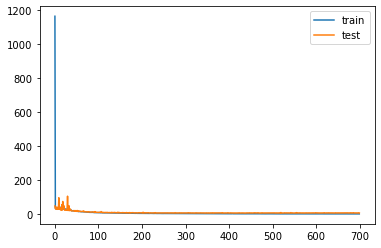

In [11]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [12]:
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(y_pred.shape[0])

110/110 [==============================] - 0s 3ms/step


In [13]:
print("RMSE on Test Data = ", sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE on Test Data = ", metrics.mean_absolute_error(y_test, y_pred))
print("R2 on Test Data = ", metrics.r2_score(y_test, y_pred))

RMSE on Test Data =  2.7224429
MAE on Test Data =  2.0014176
R2 on Test Data =  0.7234332952445406


In [14]:
df1 = DataFrame({'Actual': y_test, 'Predicted': y_pred, 'variance': y_test - y_pred})
df1.head()

,Actual,Predicted,variance
0,0.0,-1.003485,1.003485
1,6.0,12.134974,-6.134974
2,8.0,9.512856,-1.512856
3,4.0,-0.242240,4.242240
4,7.0,5.660459,1.339541


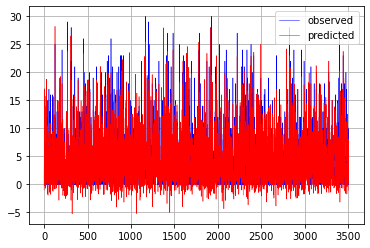

In [15]:
x_ax = range(len(x_test))
plt.plot(x_ax, y_test, lw=0.5, color='blue', label='observed')
plt.plot(x_ax, y_pred, lw=0.5, color='red', label='predicted')
plt.legend(loc='best')
plt.grid()